In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from sklearn import tree
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
from ipywidgets import interactive
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

In [2]:
data=pd.read_csv("IPL Match Data.csv")

In [3]:
data.dtypes

id                   int64
season               int64
city                object
date                object
team1               object
team2               object
toss_winner         object
toss_decision       object
result              object
dl_applied           int64
winner              object
win_by_runs          int64
win_by_wickets       int64
player_of_match     object
venue               object
umpire1             object
umpire2             object
umpire3            float64
dtype: object

In [4]:
data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [5]:
lst=list(data['season'])
mini=2017
maxi=2017
for i in lst:
    if(i<mini):
        mini=i
    if(i>maxi):
        maxi=i
print("max year : ",maxi)
print("min year : ",mini )
len(lst)/10

max year :  2017
min year :  2008


63.6

In [6]:
cnt=[0,0,0,0,0,0,0,0,0,0]
year=2008
for i in lst:
    cnt[i-2008]=cnt[i-2008]+1
for i in cnt:
    print(year," : ",i)
    year+=1

2008  :  58
2009  :  57
2010  :  60
2011  :  73
2012  :  74
2013  :  76
2014  :  60
2015  :  59
2016  :  60
2017  :  59


In [7]:
teams=set({})
All_teams=set({})
j=0
for i in lst:
    All_teams.add(data['team1'][j])
    All_teams.add(data['team2'][j])
    if(i==2017):
        teams.add(data['team1'][j])
        teams.add(data['team2'][j])
    j+=1
print(teams)
len(teams)

{'Kolkata Knight Riders', 'Gujarat Lions', 'Delhi Daredevils', 'Mumbai Indians', 'Sunrisers Hyderabad', 'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rising Pune Supergiant'}


8

In [8]:
del data["umpire1"]
del data["umpire2"]
del data["umpire3"]
del data["venue"]
del data["date"]
del data["player_of_match"]

In [9]:
data

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0
5,6,2017,Hyderabad,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9
6,7,2017,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4
7,8,2017,Indore,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8
8,9,2017,Pune,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0
9,10,2017,Mumbai,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4


In [10]:
# Deleting all teaams which havent played last time
# as they are not playing this time also
not_playing=[]
for i in np.arange(data.shape[0]):
    if(data['team1'][i] not in teams):
        not_playing.append(data['id'][i]-1)
        continue
    if(data['team2'][i] not in teams):
        not_playing.append(data['id'][i]-1)        
    
not_playing

[60,
 61,
 63,
 64,
 65,
 66,
 67,
 69,
 70,
 71,
 73,
 76,
 77,
 78,
 79,
 82,
 84,
 85,
 86,
 88,
 90,
 91,
 92,
 95,
 96,
 97,
 100,
 101,
 102,
 104,
 106,
 107,
 109,
 110,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 120,
 121,
 123,
 124,
 125,
 127,
 129,
 130,
 132,
 135,
 136,
 139,
 140,
 143,
 144,
 146,
 147,
 148,
 150,
 151,
 154,
 157,
 158,
 159,
 161,
 162,
 163,
 164,
 165,
 167,
 168,
 170,
 171,
 172,
 173,
 174,
 175,
 178,
 179,
 181,
 183,
 184,
 185,
 186,
 188,
 189,
 191,
 192,
 193,
 194,
 197,
 198,
 201,
 202,
 203,
 205,
 206,
 209,
 210,
 211,
 213,
 215,
 218,
 219,
 221,
 222,
 223,
 224,
 226,
 227,
 228,
 231,
 232,
 233,
 234,
 235,
 236,
 238,
 239,
 240,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 259,
 260,
 261,
 263,
 264,
 266,
 267,
 268,
 270,
 271,
 273,
 274,
 275,
 276,
 277,
 278,
 280,
 282,
 283,
 284,
 285,
 287,
 288,
 289,
 291,
 293,
 294,
 296,
 297,
 298,
 299,
 300,
 301,
 303,
 306,


In [11]:
data.shape


(636, 12)

In [12]:
data=data.drop(not_playing)

In [13]:
data

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7
2,3,2017,Rajkot,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10
3,4,2017,Indore,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6
4,5,2017,Bangalore,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0
5,6,2017,Hyderabad,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9
6,7,2017,Mumbai,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4
7,8,2017,Indore,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8
8,9,2017,Pune,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0
9,10,2017,Mumbai,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4


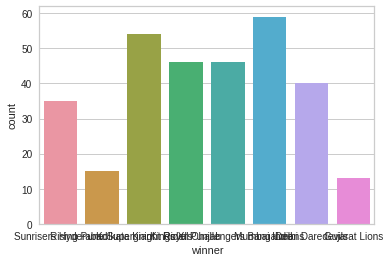

In [14]:
sns.countplot(x=data['winner'])

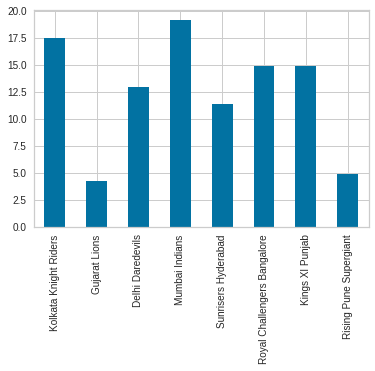

In [15]:
ax = (pd.Series(data['winner']).value_counts(normalize=True,sort=False)*100).plot.bar()

In [16]:
# Now calculating winning %age.


In [17]:
data["winner"].fillna("draw", inplace = True) 

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
teams.add('draw')
le.fit(list(teams))
le.classes_
data['team1']=le.transform(data['team1'])
data['team2']=le.transform(data['team2']) 
data['winner']=le.transform(data['winner']) 


In [19]:
data

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,1,2017,Hyderabad,7,6,Royal Challengers Bangalore,field,normal,0,7,35,0
1,2,2017,Pune,4,5,Rising Pune Supergiant,field,normal,0,5,0,7
2,3,2017,Rajkot,1,3,Kolkata Knight Riders,field,normal,0,3,0,10
3,4,2017,Indore,5,2,Kings XI Punjab,field,normal,0,2,0,6
4,5,2017,Bangalore,6,0,Royal Challengers Bangalore,bat,normal,0,6,15,0
5,6,2017,Hyderabad,1,7,Sunrisers Hyderabad,field,normal,0,7,0,9
6,7,2017,Mumbai,3,4,Mumbai Indians,field,normal,0,4,0,4
7,8,2017,Indore,6,2,Royal Challengers Bangalore,bat,normal,0,2,0,8
8,9,2017,Pune,0,5,Rising Pune Supergiant,field,normal,0,0,97,0
9,10,2017,Mumbai,7,4,Mumbai Indians,field,normal,0,4,0,4


In [20]:
from sklearn import preprocessing
le2 = preprocessing.LabelEncoder()

le2.fit(['field','bat'])
le2.classes_
data['toss_decision']=le2.transform(data['toss_decision'])

In [21]:
data['toss_winner']=le.transform(data['toss_winner']) 

In [22]:
# winning stats

In [23]:
total=0
match_and_toss_won=0
for i in range(637):
    if(i not in data.index):
        continue
    total+=1
    if(data['winner'][i]==data['toss_winner'][i]):
        match_and_toss_won+=1
print(" Percentage of winning both match and toss : ",match_and_toss_won*100/total)

 Percentage of winning both match and toss :  50.80906148867314


1     Delhi Daredevils 		
2     Gujarat Lions 		
3     Kings XI Punjab 		
4     Kolkata Knight Riders 		
5     Mumbai Indians 		
6     Rising Pune Supergiant 		
7     Royal Challengers Bangalore 		
8     Sunrisers Hyderabad 		


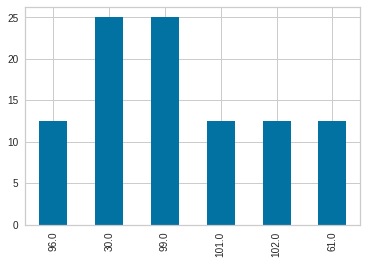

In [24]:
played= np.zeros(8)
won= np.zeros(8)
for i in range(637):
    if(i not in data.index):
        continue
    played[data['team1'][i]]+=1
    played[data['team2'][i]]+=1
    if( data['winner'][i]==data['team1'][i]):
        won[data['team1'][i]]+=1
    elif( data['winner'][i]==data['team2'][i]) :
        won[data['team2'][i]]+=1
ax = (pd.Series(played).value_counts(normalize=True,sort=False)*100).plot.bar()
for i in np.arange(8):
    print(i+1,'   ',(le.inverse_transform([i])[0]),"\t\t")

In [25]:
win_perct_age=np.zeros(8)
for i in np.arange(8):
    win_perct_age[i]=(won[i]/played[i])*100

In [26]:
print("Team\t\tWon%Age")
print()
for i in np.arange(8):
    print((le.inverse_transform([i])[0]),"\t\t")
    print("\t\t",win_perct_age[i])

Team		Won%Age

Delhi Daredevils 		
		 41.66666666666667
Gujarat Lions 		
		 43.333333333333336
Kings XI Punjab 		
		 46.464646464646464
Kolkata Knight Riders 		
		 53.46534653465347
Mumbai Indians 		
		 57.84313725490197
Rising Pune Supergiant 		
		 50.0
Royal Challengers Bangalore 		
		 46.464646464646464
Sunrisers Hyderabad 		
		 57.377049180327866


In [27]:

# As 1 wicket not equivalent to i run so multiplyiing by 10
data['win_by_wickets']*=5
data.corr()


,id,season,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets
id,1.000000,0.223713,0.058882,0.055154,0.097258,0.054722,0.056589,0.107445,-0.037735,0.001614
season,0.223713,1.000000,0.125270,0.056532,0.134915,0.282311,-0.013675,0.144688,-0.032491,-0.018338
team1,0.058882,0.125270,1.000000,-0.173928,0.208782,-0.011880,0.034276,0.284372,0.069714,-0.071944
team2,0.055154,0.056532,-0.173928,1.000000,0.600180,-0.010601,0.033875,0.509383,0.006690,0.022401
toss_winner,0.097258,0.134915,0.208782,0.600180,1.000000,-0.031018,0.039360,0.450905,-0.020964,0.023770
toss_decision,0.054722,0.282311,-0.011880,-0.010601,-0.031018,1.000000,0.040675,-0.017675,0.086247,-0.047072
dl_applied,0.056589,-0.013675,0.034276,0.033875,0.039360,0.040675,1.000000,0.076843,0.008662,-0.001672
winner,0.107445,0.144688,0.284372,0.509383,0.450905,-0.017675,0.076843,1.000000,0.044048,-0.080662
win_by_runs,-0.037735,-0.032491,0.069714,0.006690,-0.020964,0.086247,0.008662,0.044048,1.000000,-0.544790
win_by_wickets,0.001614,-0.018338,-0.071944,0.022401,0.023770,-0.047072,-0.001672,-0.080662,-0.544790,1.000000


In [28]:
data

,id,season,city,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets
0,1,2017,Hyderabad,7,6,6,1,normal,0,7,35,0
1,2,2017,Pune,4,5,5,1,normal,0,5,0,35
2,3,2017,Rajkot,1,3,3,1,normal,0,3,0,50
3,4,2017,Indore,5,2,2,1,normal,0,2,0,30
4,5,2017,Bangalore,6,0,6,0,normal,0,6,15,0
5,6,2017,Hyderabad,1,7,7,1,normal,0,7,0,45
6,7,2017,Mumbai,3,4,4,1,normal,0,4,0,20
7,8,2017,Indore,6,2,6,0,normal,0,2,0,40
8,9,2017,Pune,0,5,5,1,normal,0,0,97,0
9,10,2017,Mumbai,7,4,4,1,normal,0,4,0,20


In [29]:
data['team1_wins']=(data['winner']==data['team1']).astype(int)
data['team2_wins']=(data['winner']==data['team2']).astype(int)

In [30]:
data['team1_wins_toss']=(data['toss_winner']==data['team1']).astype(int)
data['team2_wins_toss']=(data['toss_winner']==data['team2']).astype(int)

In [31]:
del data['toss_winner']
#del data['winner']

In [32]:
# Now giving more weightage to matches according to there season as new season now team performance better
data['season']-=2007

In [33]:
#data['team1']=(le.inverse_transform(data['team1']))
#data['team2']=(le.inverse_transform(data['team2']))

In [34]:
data['toss_bat']=(data['toss_decision']==0).astype(int)
data['toss_field']=(data['toss_decision']==1).astype(int)

In [35]:
del data['toss_decision']

In [36]:
data

,id,season,city,team1,team2,result,dl_applied,winner,win_by_runs,win_by_wickets,team1_wins,team2_wins,team1_wins_toss,team2_wins_toss,toss_bat,toss_field
0,1,10,Hyderabad,7,6,normal,0,7,35,0,1,0,0,1,0,1
1,2,10,Pune,4,5,normal,0,5,0,35,0,1,0,1,0,1
2,3,10,Rajkot,1,3,normal,0,3,0,50,0,1,0,1,0,1
3,4,10,Indore,5,2,normal,0,2,0,30,0,1,0,1,0,1
4,5,10,Bangalore,6,0,normal,0,6,15,0,1,0,1,0,1,0
5,6,10,Hyderabad,1,7,normal,0,7,0,45,0,1,0,1,0,1
6,7,10,Mumbai,3,4,normal,0,4,0,20,0,1,0,1,0,1
7,8,10,Indore,6,2,normal,0,2,0,40,0,1,1,0,1,0
8,9,10,Pune,0,5,normal,0,0,97,0,1,0,0,1,0,1
9,10,10,Mumbai,7,4,normal,0,4,0,20,0,1,0,1,0,1


In [37]:
data.corr()

,id,season,team1,team2,dl_applied,winner,win_by_runs,win_by_wickets,team1_wins,team2_wins,team1_wins_toss,team2_wins_toss,toss_bat,toss_field
id,1.000000,0.223713,0.058882,0.055154,0.056589,0.107445,-0.037735,0.001614,-0.031815,0.024620,-0.054722,0.054722,-0.054722,0.054722
season,0.223713,1.000000,0.125270,0.056532,-0.013675,0.144688,-0.032491,-0.018338,0.010832,-0.013806,-0.282311,0.282311,-0.282311,0.282311
team1,0.058882,0.125270,1.000000,-0.173928,0.034276,0.284372,0.069714,-0.071944,0.117517,-0.106957,0.011880,-0.011880,0.011880,-0.011880
team2,0.055154,0.056532,-0.173928,1.000000,0.033875,0.509383,0.006690,0.022401,-0.040141,0.032416,0.010601,-0.010601,0.010601,-0.010601
dl_applied,0.056589,-0.013675,0.034276,0.033875,1.000000,0.076843,0.008662,-0.001672,-0.096217,0.097417,-0.040675,0.040675,-0.040675,0.040675
winner,0.107445,0.144688,0.284372,0.509383,0.076843,1.000000,0.044048,-0.080662,0.071917,-0.085172,0.017675,-0.017675,0.017675,-0.017675
win_by_runs,-0.037735,-0.032491,0.069714,0.006690,0.008662,0.044048,1.000000,-0.544790,0.608711,-0.604532,-0.086247,0.086247,-0.086247,0.086247
win_by_wickets,0.001614,-0.018338,-0.071944,0.022401,-0.001672,-0.080662,-0.544790,1.000000,-0.868770,0.874633,0.047072,-0.047072,0.047072,-0.047072
team1_wins,-0.031815,0.010832,0.117517,-0.040141,-0.096217,0.071917,0.608711,-0.868770,1.000000,-0.993296,-0.040778,0.040778,-0.040778,0.040778
team2_wins,0.024620,-0.013806,-0.106957,0.032416,0.097417,-0.085172,-0.604532,0.874633,-0.993296,1.000000,0.045523,-0.045523,0.045523,-0.045523


In [38]:
X=data.loc[:,['season','win_by_runs','win_by_wickets','team1','team2','team1_wins_toss','team2_wins_toss','toss_bat','toss_field']]
y=data['team1_wins']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)



In [39]:
lm=LogisticRegression()
lm.fit(X_train,y_train)
lm_predict=lm.predict(X_test)
lm.score(X_test,y_test)

/home/dhruv_bansal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.956989247311828

/home/dhruv_bansal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


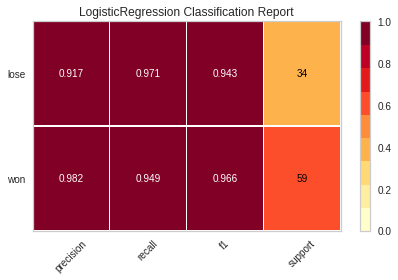

In [40]:
visualizer = ClassificationReport(lm, classes=['won','lose'], support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [41]:
lm_auc=roc_auc_score(y_test,lm_predict)

In [42]:
#SVM

In [43]:
from sklearn.svm import SVC
svm=SVC(kernel='poly',degree=1)
print(svm)
svm.fit(X_train,y_train)
svm_predict=svm.predict(X_test)
print('score : ',svm.score(X_test,y_test))


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
score :  0.967741935483871


/home/dhruv_bansal/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [44]:
from sklearn.metrics import confusion_matrix
svm_test=confusion_matrix(y_test,svm_predict)
print('test :\n',svm_test)

test :
 [[56  3]
 [ 0 34]]


In [45]:
svm_auc=roc_auc_score(y_test,svm_predict)

/home/dhruv_bansal/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


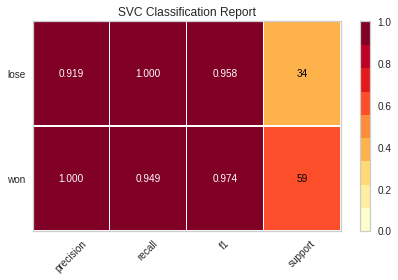

In [46]:
visualizer = ClassificationReport(svm, classes=['won','lose'], support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [47]:
#DecisionTreeClassifier


In [48]:
clf=DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [49]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [50]:
graph = Source(tree.export_graphviz(clf, out_file=None
   , feature_names=['season','win_by_runs','win_by_wickets','team1','team2','team1_wins_toss','team2_wins_toss','toss_bat','toss_field'], class_names=['won','loose'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

In [ ]:
clf.score(X_test,y_test)

In [ ]:
clf_predict=clf.predict(X_test)
clf_auc=roc_auc_score(y_test,clf_predict)

In [ ]:
visualizer = ClassificationReport(clf, classes=['won','lose'], support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [ ]:
# KNN K=5

In [ ]:
knn5 = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn5.fit(X_train, y_train)

#Predict the response for test dataset
knn5_predict = knn5.predict(X_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, knn5_predict))

In [ ]:
visualizer = ClassificationReport(knn5, classes=['won','lose'], support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [ ]:
knn5_auc=roc_auc_score(y_test,knn5_predict)

In [ ]:
# KNN K=7

In [51]:
knn7 = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn7.fit(X_train, y_train)

#Predict the response for test dataset
knn7_predict = knn7.predict(X_test)

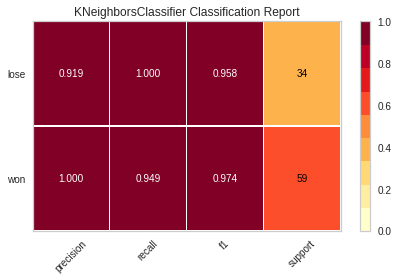

In [52]:
visualizer = ClassificationReport(knn7, classes=['won','lose'], support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [53]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, knn7_predict))

Accuracy: 0.967741935483871


In [54]:
knn7_auc=roc_auc_score(y_test,knn7_predict)

In [55]:
#NB

In [56]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_predict = gnb.predict(X_test)

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, gnb_predict))

Accuracy: 0.967741935483871


In [58]:
gnb_auc=roc_auc_score(y_test,gnb_predict)

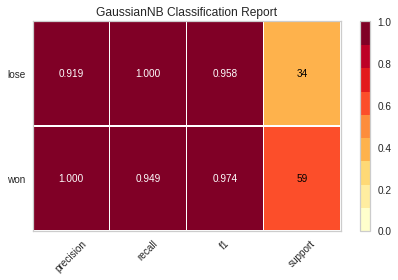

In [59]:
bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=['won','lose'], support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [60]:
print("        AUC score ")
print()
print('logistic      : ',lm_auc*100)
print('Desicion Tree : ',clf_auc*100)
print('Svm           : ',svm_auc*100)
print('knn where k=5 : ',knn5_auc*100)
print('knn where k=7 : ',knn7_auc*100)
print('Naive Theorem : ',gnb_auc*100)

        AUC score 

logistic      :  95.98703888334995


NameError: name 'clf_auc' is not defined